### Name: Kagheni Jenner Maximillien
### Student ID: 118-887
### Program: MIT-2
### Module: MIT725 - Data Warehousing and Data Mining
### CAT-1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import lxml.html as lh

In [3]:
# Get the data
countries = "https://www.worldometers.info/population/countries-in-africa-by-population/"
page = requests.get(countries)
doc = lh.fromstring(page.content)
tr_elements = doc.xpath('//tr')
[len(T) for T in tr_elements[:12]]

[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]

In [4]:
# Parse the first row as header
tr_elements = doc.xpath('//tr')

col = []
i = 0
for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print("%d:%s" % (i,name))
    col.append((name,[]))

1: #    
2: Country (ordependency)    
3: Population(2025)    
4: YearlyChange    
5: NetChange    
6: Density(P/Km²)    
7: Land Area(Km²)    
8: Migrants(net)    
9: Fert.Rate    
10: MedianAge    
11: UrbanPop %    
12: WorldShare    


In [5]:
# Check the data in other rows
for j in range(1,len(tr_elements)):
    T = tr_elements[j]
    
    if len(T)!=12: 
        break
        
    i = 0
    
    for t in T.iterchildren():
        data=t.text_content()
            
        col[i][1].append(data)
            
        i+=1

In [6]:
# Check the length of each column
[len(C) for (title,C) in col]

[58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58]

1) Use python to clean the data, get descriptive statistics and default correlations among these variables.

In [7]:
# Create the dataframe
Dict = {title:column for (title,column) in col}
df = pd.DataFrame(Dict)

In [8]:
df.head()

,#,Country (ordependency),Population(2025),YearlyChange,NetChange,Density(P/Km²),Land Area(Km²),Migrants(net),Fert.Rate,MedianAge,UrbanPop %,WorldShare
0,1,Nigeria,"237,527,782",2.08%,"4,848,304",261,"910,770","−15,258",4.3,18,55%,2.89%
1,2,Ethiopia,"135,472,051",2.58%,"3,412,284",135,"1,000,000","24,054",3.8,19,23%,1.65%
2,3,Egypt,"118,365,995",1.57%,"1,827,737",119,"995,450","−57,305",2.7,24,41%,1.44%
3,4,DR Congo,"112,832,473",3.25%,"3,556,208",50,"2,267,050","−27,309",5.9,16,45%,1.37%
4,5,Tanzania,"70,545,865",2.9%,"1,985,708",80,"885,800","−12,730",4.5,17,40%,0.86%


In [9]:
df.tail()

,#,Country (ordependency),Population(2025),YearlyChange,NetChange,Density(P/Km²),Land Area(Km²),Migrants(net),Fert.Rate,MedianAge,UrbanPop %,WorldShare
53,54,Cabo Verde,"527,326",0.47%,"2,449",131,"4,030","−1,284",1.5,29,79%,0.0064%
54,55,Mayotte,"337,011",3.22%,"10,506",899,375,44,4.5,17,41%,0.0041%
55,56,Sao Tome & Principe,"240,254",2%,"4,718",250,960,−650,3.5,19,78%,0.0029%
56,57,Seychelles,"132,779",1.81%,"2,361",289,460,"1,590",2.1,34,44%,0.0016%
57,58,Saint Helena,"5,197",−0.76%,−40,13,390,1,1.6,51,33%,0.000063%


In [10]:
df

,#,Country (ordependency),Population(2025),YearlyChange,NetChange,Density(P/Km²),Land Area(Km²),Migrants(net),Fert.Rate,MedianAge,UrbanPop %,WorldShare
0,1,Nigeria,"237,527,782",2.08%,"4,848,304",261,"910,770","−15,258",4.3,18,55%,2.89%
1,2,Ethiopia,"135,472,051",2.58%,"3,412,284",135,"1,000,000","24,054",3.8,19,23%,1.65%
2,3,Egypt,"118,365,995",1.57%,"1,827,737",119,"995,450","−57,305",2.7,24,41%,1.44%
3,4,DR Congo,"112,832,473",3.25%,"3,556,208",50,"2,267,050","−27,309",5.9,16,45%,1.37%
4,5,Tanzania,"70,545,865",2.9%,"1,985,708",80,"885,800","−12,730",4.5,17,40%,0.86%
5,6,South Africa,"64,747,319",1.16%,"740,132",53,"1,213,090","146,370",2.2,29,67%,0.79%
6,7,Kenya,"57,532,493",1.95%,"1,099,549",101,"569,140","−27,330",3.1,20,32%,0.70%
7,8,Sudan,"51,662,147",2.4%,"1,213,184",29,"1,765,048","291,469",4.2,19,35%,0.63%
8,9,Uganda,"51,384,894",2.74%,"1,369,802",257,"199,810","−119,059",4.1,17,30%,0.62%
9,10,Algeria,"47,435,312",1.33%,"621,004",20,"2,381,740","−27,531",2.7,29,74%,0.58%


In [11]:
df.shape

(58, 12)

In [12]:
df.dtypes

#                             object
Country (ordependency)        object
Population(2025)              object
YearlyChange                  object
NetChange                     object
Density(P/Km²)                object
Land Area(Km²)                object
Migrants(net)                 object
Fert.Rate                     object
MedianAge                     object
UrbanPop %                    object
WorldShare                    object
dtype: object

In [13]:
# Print the column names to verify
print(df.columns)

Index([' #    ', ' Country (ordependency)    ', ' Population(2025)    ',
       ' YearlyChange    ', ' NetChange    ', ' Density(P/Km²)    ',
       ' Land Area(Km²)    ', ' Migrants(net)    ', ' Fert.Rate    ',
       ' MedianAge    ', ' UrbanPop %    ', ' WorldShare    '],
      dtype='object')


In [14]:
# Remove leading and trailing white spaces from column names
df.columns = df.columns.str.strip()

In [15]:
# Print the column names to verify
df.columns

Index(['#', 'Country (ordependency)', 'Population(2025)', 'YearlyChange',
       'NetChange', 'Density(P/Km²)', 'Land Area(Km²)', 'Migrants(net)',
       'Fert.Rate', 'MedianAge', 'UrbanPop %', 'WorldShare'],
      dtype='object')

In [16]:
# Remove commas from numeric columns and convert to appropriate data types
numeric_columns = ['Population(2025)', 'NetChange', 'Density(P/Km²)', 'Land Area(Km²)', 'Migrants(net)', 'Fert.Rate', 'MedianAge']
for column in numeric_columns:
    if column in df.columns:
        df[column] = pd.to_numeric(df[column].astype(str).str.replace(',', ''), errors='coerce').fillna(0)
    else:
        print(f"Column '{column}' not found in DataFrame")

In [17]:
# Convert percentage columns to float
df['YearlyChange'] = pd.to_numeric(df['YearlyChange'].astype(str).str.replace('%', ''), errors='coerce').fillna(0)
df['UrbanPop %'] = pd.to_numeric(df['UrbanPop %'].astype(str).str.replace('%', ''), errors='coerce').fillna(0)
df['WorldShare'] = pd.to_numeric(df['WorldShare'].astype(str).str.replace('%', ''), errors='coerce').fillna(0)

In [18]:
# Get descriptive statistics
df.describe()

,Population(2025),YearlyChange,NetChange,Density(P/Km²),Land Area(Km²),Migrants(net),Fert.Rate,MedianAge,UrbanPop %,WorldShare
count,5.800000e+01,58.000000,5.800000e+01,58.000000,5.800000e+01,58.000000,58.000000,58.000000,58.000000,58.000000
mean,2.672185e+07,2.084310,5.987873e+05,134.310345,5.111807e+05,8926.258621,3.651724,21.672414,48.448276,0.325334
std,4.076189e+07,0.830477,9.231945e+05,179.207241,5.848486e+05,42462.914971,1.144819,6.865597,19.846934,0.495914
min,5.197000e+03,0.000000,0.000000e+00,2.000000,3.750000e+02,0.000000,1.200000,14.000000,0.000000,0.000063
25%,2.569874e+06,1.772500,4.966675e+04,29.000000,2.868000e+04,0.000000,2.700000,18.000000,34.250000,0.031250
50%,1.447967e+07,2.180000,3.145980e+05,71.000000,2.698000e+05,0.000000,3.750000,19.000000,45.500000,0.175000
75%,3.273340e+07,2.587500,7.351555e+05,134.000000,8.140625e+05,0.750000,4.200000,22.000000,63.250000,0.400000
max,2.375278e+08,3.470000,4.848304e+06,899.000000,2.381740e+06,291469.000000,5.900000,51.000000,97.000000,2.890000


In [19]:
df

,#,Country (ordependency),Population(2025),YearlyChange,NetChange,Density(P/Km²),Land Area(Km²),Migrants(net),Fert.Rate,MedianAge,UrbanPop %,WorldShare
0,1,Nigeria,237527782,2.08,4848304.0,261,910770,0.0,4.3,18,55.0,2.890000
1,2,Ethiopia,135472051,2.58,3412284.0,135,1000000,24054.0,3.8,19,23.0,1.650000
2,3,Egypt,118365995,1.57,1827737.0,119,995450,0.0,2.7,24,41.0,1.440000
3,4,DR Congo,112832473,3.25,3556208.0,50,2267050,0.0,5.9,16,45.0,1.370000
4,5,Tanzania,70545865,2.90,1985708.0,80,885800,0.0,4.5,17,40.0,0.860000
5,6,South Africa,64747319,1.16,740132.0,53,1213090,146370.0,2.2,29,67.0,0.790000
6,7,Kenya,57532493,1.95,1099549.0,101,569140,0.0,3.1,20,32.0,0.700000
7,8,Sudan,51662147,2.40,1213184.0,29,1765048,291469.0,4.2,19,35.0,0.630000
8,9,Uganda,51384894,2.74,1369802.0,257,199810,0.0,4.1,17,30.0,0.620000
9,10,Algeria,47435312,1.33,621004.0,20,2381740,0.0,2.7,29,74.0,0.580000


In [20]:
df2 = df.select_dtypes(include=[np.number])

In [21]:
# Calculate correlations
df2.corr()

,Population(2025),YearlyChange,NetChange,Density(P/Km²),Land Area(Km²),Migrants(net),Fert.Rate,MedianAge,UrbanPop %,WorldShare
Population(2025),1.000000,0.169774,0.961195,-0.044551,0.481102,0.150982,0.198767,-0.188145,-0.113794,0.999991
YearlyChange,0.169774,1.000000,0.312000,-0.078493,0.285794,-0.003492,0.932639,-0.848707,-0.192147,0.169378
NetChange,0.961195,0.312000,1.000000,-0.059160,0.511683,0.115645,0.346745,-0.282459,-0.178411,0.960892
Density(P/Km²),-0.044551,-0.078493,-0.059160,1.000000,-0.407305,-0.100801,-0.095162,0.065462,-0.347739,-0.045140
Land Area(Km²),0.481102,0.285794,0.511683,-0.407305,1.000000,0.335308,0.329636,-0.175410,0.072378,0.481699
Migrants(net),0.150982,-0.003492,0.115645,-0.100801,0.335308,1.000000,-0.008456,0.008499,-0.037638,0.151625
Fert.Rate,0.198767,0.932639,0.346745,-0.095162,0.329636,-0.008456,1.000000,-0.823230,-0.280089,0.198363
MedianAge,-0.188145,-0.848707,-0.282459,0.065462,-0.175410,0.008499,-0.823230,1.000000,0.155985,-0.187781
UrbanPop %,-0.113794,-0.192147,-0.178411,-0.347739,0.072378,-0.037638,-0.280089,0.155985,1.000000,-0.113747
WorldShare,0.999991,0.169378,0.960892,-0.045140,0.481699,0.151625,0.198363,-0.187781,-0.113747,1.000000


2) Create a simple Linear Regression model between the two features and determine the r-squared and mean square error values with graphical representation.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
# Select two features for the linear regression model
X = df[['Population(2025)']].values.reshape(-1, 1)
y = df['NetChange'].values.reshape(-1, 1)

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Make predictions
y_pred = model.predict(X_test)

In [27]:
# Calculate r-squared and mean squared error
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R-squared: {r_squared}')
print(f'Mean Squared Error: {mse}')

R-squared: 0.9324994638848323
Mean Squared Error: 153656373182.09067


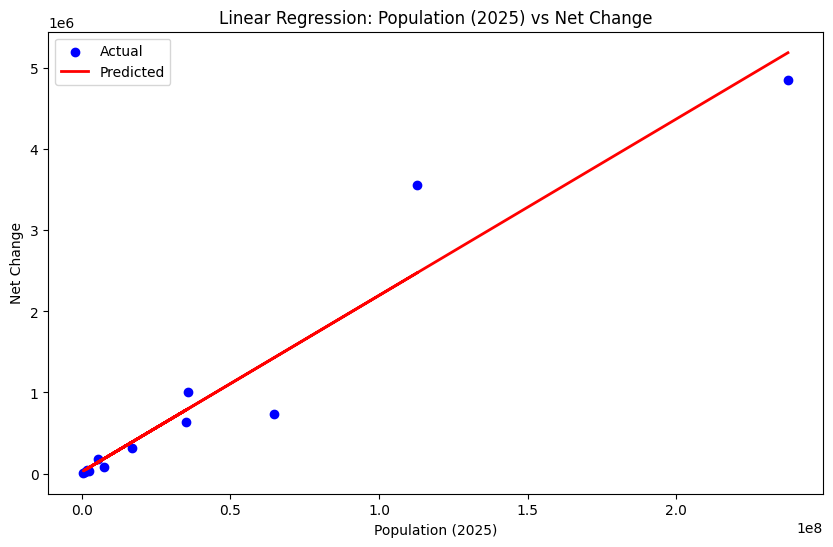

In [28]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Population (2025)')
plt.ylabel('Net Change')
plt.title('Linear Regression: Population (2025) vs Net Change')
plt.legend()
plt.show()

3) Create a Multiple Linear Regression model between the other  features  where Net Change is dependent variable. Thus,  determine the r-squared and mean square error values with graphical representation.

In [29]:
# Select features and target variable
X = df2.drop(columns=['NetChange'])
y = df2['NetChange']

In [30]:
df2

,Population(2025),YearlyChange,NetChange,Density(P/Km²),Land Area(Km²),Migrants(net),Fert.Rate,MedianAge,UrbanPop %,WorldShare
0,237527782,2.08,4848304.0,261,910770,0.0,4.3,18,55.0,2.890000
1,135472051,2.58,3412284.0,135,1000000,24054.0,3.8,19,23.0,1.650000
2,118365995,1.57,1827737.0,119,995450,0.0,2.7,24,41.0,1.440000
3,112832473,3.25,3556208.0,50,2267050,0.0,5.9,16,45.0,1.370000
4,70545865,2.90,1985708.0,80,885800,0.0,4.5,17,40.0,0.860000
5,64747319,1.16,740132.0,53,1213090,146370.0,2.2,29,67.0,0.790000
6,57532493,1.95,1099549.0,101,569140,0.0,3.1,20,32.0,0.700000
7,51662147,2.40,1213184.0,29,1765048,291469.0,4.2,19,35.0,0.630000
8,51384894,2.74,1369802.0,257,199810,0.0,4.1,17,30.0,0.620000
9,47435312,1.33,621004.0,20,2381740,0.0,2.7,29,74.0,0.580000


In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
# Make predictions
y_pred = model.predict(X_test)

In [34]:
# Calculate r-squared and mean squared error
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R-squared: {r_squared}')
print(f'Mean Squared Error: {mse}')

R-squared: 0.946739740213694
Mean Squared Error: 121240197848.75146


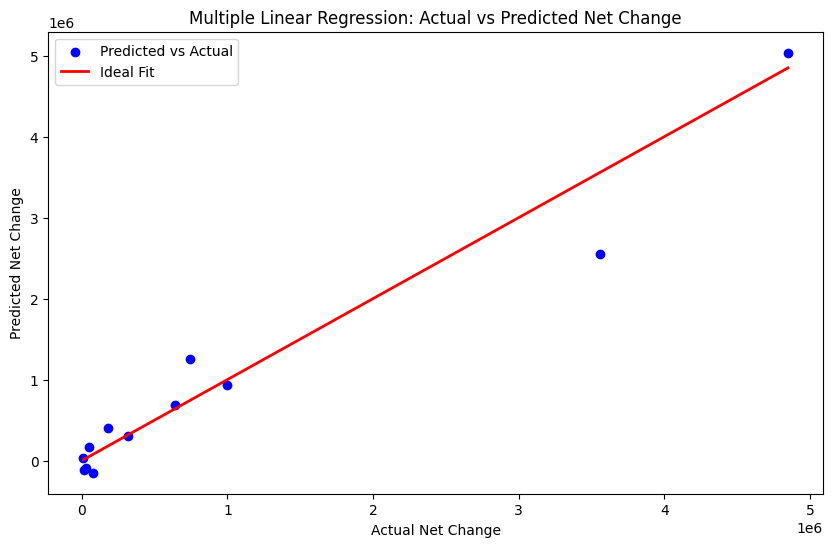

In [35]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Net Change')
plt.ylabel('Predicted Net Change')
plt.title('Multiple Linear Regression: Actual vs Predicted Net Change')
plt.legend()
plt.show()

4) Create a polynomial  Regression model between the two features media age and fertility rate. Hence determine the r-squared and mean square error values with graphical representation.

In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
# Select features and target variable
X_poly = df[['MedianAge']]
y_poly = df['Fert.Rate']

In [38]:
# Generate polynomial features
poly = PolynomialFeatures(degree=2)
X_poly_transformed = poly.fit_transform(X_poly)

In [39]:
# Split the data into training and testing sets
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly_transformed, y_poly, test_size=0.2, random_state=42)

In [40]:
# Create and train the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_poly_train)

LinearRegression()

In [41]:
# Make predictions
y_poly_pred = poly_model.predict(X_poly_test)

In [42]:
# Calculate r-squared and mean squared error
r_squared_poly = r2_score(y_poly_test, y_poly_pred)
mse_poly = mean_squared_error(y_poly_test, y_poly_pred)
print(f'R-squared (Polynomial Regression): {r_squared_poly}')
print(f'Mean Squared Error (Polynomial Regression): {mse_poly}')

R-squared (Polynomial Regression): 0.840430715953959
Mean Squared Error (Polynomial Regression): 0.2603195570006663


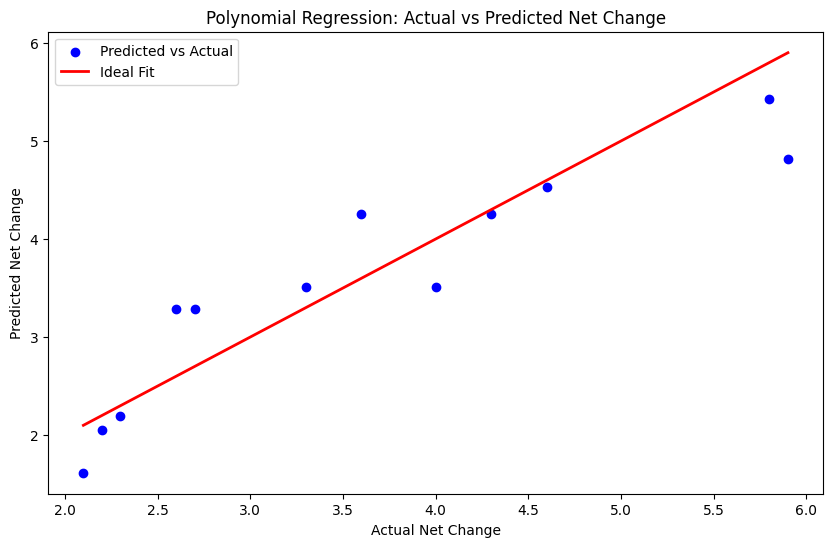

In [43]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_poly_test, y_poly_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_poly_test.min(), y_poly_test.max()], [y_poly_test.min(), y_poly_test.max()], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Net Change')
plt.ylabel('Predicted Net Change')
plt.title('Polynomial Regression: Actual vs Predicted Net Change')
plt.legend()
plt.show()